In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
%matplotlib inline 

In [2]:
def get_mnist_data():
    df = pd.read_csv('../data/mnist/train.csv',header=None)
    data = df.iloc[1:].as_matrix()
    data = data.astype('int')
    Y = data[:,0]
    X = data[:,1:]/255.0
    return X,Y

In [3]:
X,Y = get_mnist_data()

/Users/adnguyen/env/tensorflow/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2821: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,2

In [4]:
def display_sample_image(X,Y):
    labels = ["0","1","2","3","4","5","6","7","8","9"]
    X, Y = shuffle(X,Y)
    for i in xrange(12):
        plt.subplot(3,4,i)
        img = X[i].reshape(28,28)
        plt.imshow(img,cmap='gray')
        plt.axis("off")
        plt.title(labels[Y[i]])
    plt.show()

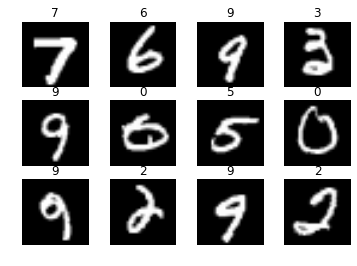

In [5]:
display_sample_image(X,Y)

In [6]:
def softmax(A):
    expA = np.exp(A)
    return expA / expA.sum(axis=1,keepdims=True)

In [7]:
def cost(T,Y):
    return -(T*np.log(Y)).sum()

In [8]:
def y2indicator(Y):
    N = Y.shape[0]
    K = len(set(Y))
    Y_ind = np.zeros((N,K))
    for i in xrange(N):
        Y_ind[i,Y[i]] = 1
    return Y_ind

In [9]:
def error_rate(targets,predictions):
    return np.mean(targets != predictions)

In [10]:
class Logistic_classifier(object):
    def __init__(self):
        pass
    def train(self,X,Y,learning_rate=10e-8,reg=10e-12,epochs=100000,show_fig=True):
        X_train, T_train = X[:-1000],Y[:-1000]
        X_valid, T_valid = X[-1000:], Y[-1000:]
        T_train_ind = y2indicator(T_train)
        T_valid_ind = y2indicator(T_valid)
        N,D = X_train.shape
        K = len(set(T_train))
        self.W = np.random.randn(D,K) / np.sqrt(D+K)
        self.b = np.random.randn(K)
        costs = []
        best_validation_error = 1
        for epoch in xrange(epochs):
            P_Y_train = self.forward(X_train)
            self.W -= learning_rate*(X_train.T.dot(P_Y_train - T_train_ind) + reg*self.W)
            self.b -= learning_rate*((P_Y_train - T_train_ind).sum(axis=0) + reg*self.b)
            if epoch % 10000 == 0:
                P_Y_valid = self.forward(X_valid)
                c = cost(T_valid_ind,P_Y_valid)
                costs.append(c)
                e = error_rate(T_valid,np.argmax(P_Y_valid,axis=1))
                print "epoch:", epoch, "cost:", c, "error:", e
                if e < best_validation_error:
                    best_validation_error = e
        print "best_validation_error:", best_validation_error
        if show_fig:
            plt.plot(costs)
            plt.show()
    def forward(self,X):
        return softmax(X.dot(self.W) + self.b)
    def predict(self,X):
        P_Y = self.forward(X)
        return np.argmax(P_Y,axis=1)
    def score(self,X,Y):
        prediction = self.predict(X)
        return 1 - error_rate(prediction,Y)
    

epoch: 0 cost: 2984.16358033 error: 0.899
epoch: 10000 cost: 413.689232284 error: 0.116
epoch: 20000 cost: 363.330725112 error: 0.105
epoch: 30000 cost: 341.969309359 error: 0.099
epoch: 40000 cost: 329.619322108 error: 0.095
epoch: 50000 cost: 321.447082479 error: 0.095
epoch: 60000 cost: 315.60089233 error: 0.093
epoch: 70000 cost: 311.193464672 error: 0.092
epoch: 80000 cost: 307.739912001 error: 0.091
epoch: 90000 cost: 304.951562407 error: 0.089
best_validation_error: 0.089


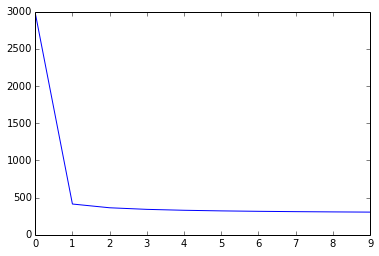

In [11]:
logis = Logistic_classifier()
logis.train(X,Y)